In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

In [2]:
# I'm using pingouin for partial correlations.
# You might need to install it, e.g., using the line below.
# This needs to be run only once per install.
# !conda install -c conda-forge pingouin
import pingouin as pg

In [3]:
## the example from the video

# raw correlations
rmg = .7
rsg = .8
rms = .9

# partial correlations
rho_mg_s = (rmg - rsg*rms) / ( np.sqrt(1-rsg**2)*np.sqrt(1-rms**2) )
rho_sg_m = (rsg - rmg*rms) / ( np.sqrt(1-rmg**2)*np.sqrt(1-rms**2) )

print(rho_mg_s)
print(rho_sg_m)

-0.07647191129018778
0.5461186812727504


In [4]:
## now for datasets

N = 76

# correlated datasets
x1 = np.linspace(1,10,N) + np.random.randn(N)
x2 = x1 + np.random.randn(N)
x3 = x1 + np.random.randn(N)

# let's convert these data to a pandas frame
df = pd.DataFrame()
df['x1'] = x1
df['x2'] = x2
df['x3'] = x3

# compute the "raw" correlation matrix
cormatR = df.corr()
print(cormatR)

# print out one value
print(' ')
print(cormatR.values[1,0])

# partial correlation
pc = pg.partial_corr(df,x='x3',y='x2',covar='x1')
print(' ')
print(pc)

          x1        x2        x3
x1  1.000000  0.940058  0.958367
x2  0.940058  1.000000  0.895486
x3  0.958367  0.895486  1.000000
 
0.9400581139386137
 
          n         r          CI95%     p-val
pearson  76 -0.055806  [-0.28, 0.17]  0.634399


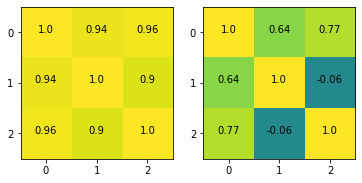

In [5]:
## visualize the matrices

fig,ax = plt.subplots(1,2,figsize=(6,3))

# raw correlations
ax[0].imshow(cormatR.values,vmin=-1,vmax=1)
ax[0].set_xticks(range(3))
ax[0].set_yticks(range(3))

# add text 
for i in range(3):
    for j in range(3):
        ax[0].text(i,j,np.round(cormatR.values[i,j],2), horizontalalignment='center')

        
        
# partial correlations
partialCorMat = df.pcorr()
ax[1].imshow(partialCorMat.values,vmin=-1,vmax=1)
ax[1].set_xticks(range(3))
ax[1].set_yticks(range(3))

for i in range(3):
    for j in range(3):
        ax[1].text(i,j,np.round(partialCorMat.values[i,j],2), horizontalalignment='center')


plt.show()